In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import style_figs

# graph tree intro : https://docs.google.com/drawings/d/1gbYLXWpubn5CPudGKPMhETyLwDcvKS2yLiAzF1nIgFo/edit?usp=sharing

In [3]:

dataset = pd.read_csv("datasets/penguins.csv").dropna(subset=["Body Mass (g)"])


X = dataset["Body Mass (g)"].to_numpy()
y = dataset["Species"].apply(lambda x: x.split()[0]).to_numpy()


sorted_idx = np.argsort(X)
X = X[sorted_idx]
y = y[sorted_idx]



for clazz in np.unique(y):
    plt.hist(X[y==clazz], alpha=0.7, label=f'{clazz}', density=True)
plt.legend()
plt.xlabel('Body mass (g)')
plt.ylabel('Class probability');

FileNotFoundError: [Errno 2] File datasets/penguins.csv does not exist: 'datasets/penguins.csv'

In [ ]:
mask_gentoo = y == "Gentoo"
mask_adelie = y == "Adelie"
X = X[mask_adelie | mask_gentoo]
y = y[mask_adelie | mask_gentoo]
df = pd.DataFrame({'Body mass (g)': X, 'label': y, '': ""})

for clazz in np.unique(y):
    plt.hist(X[y==clazz], alpha=0.7, label=f'{clazz}', density=True)
plt.legend()
plt.xlabel('Body mass (g)')
plt.ylabel('Class probability');

In [ ]:
import seaborn as sns
# create a random state such we all have the same results
rng = np.random.RandomState(42)
random_idx = rng.choice(np.arange(y.size))

ax = sns.swarmplot(x='Body mass (g)', y='', hue='label', data=df)
# ax.set_title(f"random_idx={random_idx}")
_ = ax.plot([X[random_idx], X[random_idx]], [-1, 1], 'r-.')
plt.savefig('tree_1split.svg')

In [5]:
dataset = dataset[[spe[:3] != 'Chi' for spe in dataset['Species']]]
color = ['b' if (x[0] == "A") else 'orange' for x in dataset["Species"]]
plt.figure(figsize = (4,3))
style_figs.light_axis()
plt.ylabel('$x_1$', size=26, weight=600)
plt.xlabel('$x_0$', size=26, weight=600)
plt.xlim((2700, 6600))


# sns.scatterplot(x = 'Body Mass (g)', y= 'Culmen Depth (mm)', hue = 'Species', data = dataset,
#                legend = False)
plt.scatter(dataset['Body Mass (g)'], dataset['Culmen Depth (mm)'], c = color, 
            cmap=plt.cm.bwr, edgecolor='black')
x_sep = 4300
plt.plot([x_sep, x_sep], [13,22], 'r-.')
plt.savefig('tree2D_1split.svg', bbox_inches = 'tight')

# plt.plot([x_sep, 6600], [17.4, 17.4], 'r:')
plt.plot([2700, x_sep], [15, 15], 'r', ls = ':')
plt.savefig('tree2D_2split.svg', bbox_inches = 'tight')

plt.plot([x_sep, 6600], [17.4, 17.4], 'r:')
plt.plot([2700, x_sep], [15, 15], 'r', ls = ':')
plt.savefig('tree2D_3split.svg', bbox_inches = 'tight')

#plt.scatter(dataset['Body Mass (g)'], dataset['Island'], c =cc)

NameError: name 'dataset' is not defined

In [4]:
# Visual with the above figure:
# https://docs.google.com/drawings/d/1rINa_f_qxlIjsDpVv78hHqIgG5heheNHdnbGZJtBRvo/edit?usp=sharing
# https://docs.google.com/drawings/d/1pL1soD6ZHKoOiAf5Z0zIecB9vJUxqAtuVMgAGJA_A4Y/edit?usp=sharing
# https://docs.google.com/drawings/d/1rkAnu_2pkn-Dk-Jo8vhJZJWDBUtBjwOP0chk4JjdT0s/edit?usp=sharing

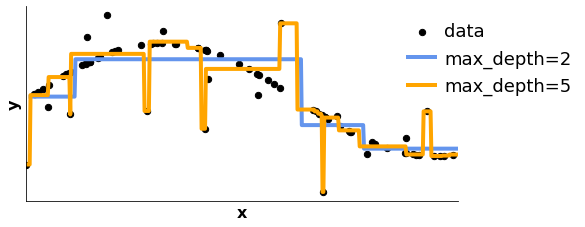

In [175]:
# Regression
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize = (4,3))
ax = plt.axes([.1, .1, 1.5, .9])
# plt.axis('tight')
style_figs.light_axis()

# plt.xlim((0,7))
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.xlim((0,5))

plt.scatter(X, y, s=40, edgecolor="black",
            c="k", label = 'data               ')
plt.legend(loc = 1, bbox_to_anchor=(.8, .5, 0.5, 0.5))
plt.savefig('tree_regression1.svg', facecolor='none', edgecolor='none',
            bbox_inches = 'tight')
plt.plot(X_test + .05 * np.ones(X_test.shape), y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=4)
# sort both labels and handles by labels
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels,loc = 1, bbox_to_anchor=(.8, .5, 0.5, 0.5))
plt.savefig('tree_regression2.svg', facecolor='none', edgecolor='none',
            bbox_inches = 'tight')

plt.plot(X_test, y_2, color="orange", label="max_depth=5", linewidth=4)
# sort both labels and handles by labels
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
ax.legend(handles, labels,loc = 1, bbox_to_anchor=(.8, .5, 0.5, 0.5))

plt.savefig('tree_regression3.svg', facecolor='none', edgecolor='none',
            bbox_inches = 'tight')

# Boosting

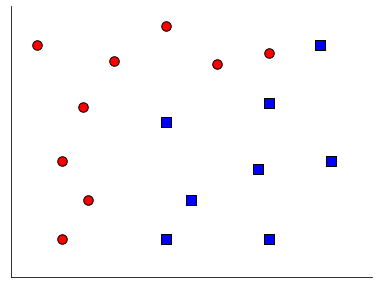

In [96]:
circle = [[1,1], [1,3], [1.5,2], [1.4, 4.4], [.5,6], [2, 5.6]]
circle2 = [[3, 6.5], [4, 5.5], [5, 5.8]]

square = [[3,1], [3,4], [3.5, 2], [5,4.5], [5,1], [6.2, 3], [4.8, 2.8]]
square2 = [[6,6]]
          
def plot_init(col_c = 'r', col_s = 'b', size = 90):
    plt.xlim((0,7))
    plt.ylim((0,7))

    plt.scatter([xy[0] for xy in circle], [xy[1] for xy in circle], c = col_c,
                edgecolor = 'k', s = size)
    plt.scatter([xy[0] for xy in circle2], [xy[1] for xy in circle2], c = col_c,
                edgecolor = 'k', s = size)

    plt.scatter([xy[0] for xy in square], [xy[1] for xy in square], marker = 's', c = col_s,
                edgecolor = 'k', s = size)
    plt.scatter([xy[0] for xy in square2], [xy[1] for xy in square2], marker = 's', c = col_s,
                edgecolor = 'k', s = size)

plot_init()
style_figs.light_axis()
plt.savefig('boosting0.svg', facecolor='none', edgecolor='none')

col_sep = 'grey'

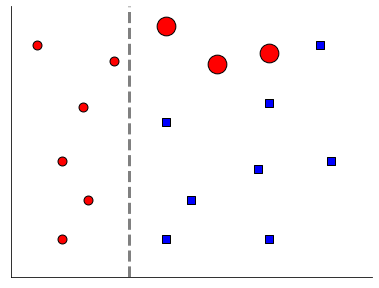

In [97]:
plot_init(size = 80)
style_figs.light_axis()

plt.plot([2.3, 2.3], [0,7], col_sep, ls = '--')
plt.scatter([xy[0] for xy in circle2], [xy[1] for xy in circle2], c = 'r',
            edgecolor = 'k', s = 350)
plt.savefig('boosting1.svg', facecolor='none', edgecolor='none')


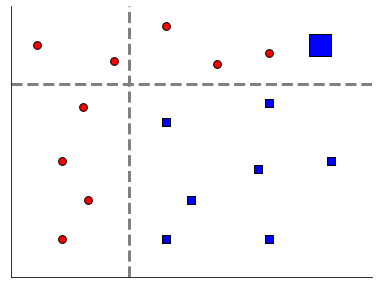

In [98]:
plot_init(size = 60)
style_figs.light_axis()

plt.plot([2.3, 2.3], [0,7], col_sep, ls = '--')
plt.plot([0, 7], [5, 5], col_sep, ls = '--')
# plt.scatter([xy[0] for xy in circle2], [xy[1] for xy in circle2], c = 'r', s = 150)
plt.scatter([xy[0] for xy in square2], [xy[1] for xy in square2], marker = 's', c = 'b',
            edgecolor = 'k', s = 450)
plt.savefig('boosting2.svg', facecolor='none', edgecolor='none')


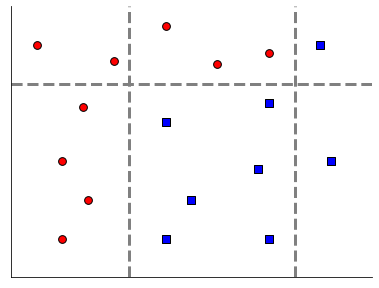

In [99]:
plot_init(size = 60)
style_figs.light_axis()

plt.plot([2.3, 2.3], [0,7], col_sep, ls = '--')
plt.plot([0, 7], [5, 5], col_sep, ls = '--')
plt.plot([5.5, 5.5], [0,7], col_sep, ls = '--')
# plt.scatter([xy[0] for xy in circle2], [xy[1] for xy in circle2], c = 'r', s = 150)
# plt.scatter([xy[0] for xy in square2], [xy[1] for xy in square2], marker = 's', c = 'b', s = 250)
plt.savefig('boosting3.svg', facecolor='none', edgecolor='none')


In [ ]:
# Link to tree drawing : 
# https://docs.google.com/drawings/d/1hlWjd74To_4Zg83SKdp2KvOfNhCKO6ty9eJLF_e_SaU/edit?usp=sharing